**Understanding Consumer Price Index microdata**

In [31]:
import os
import pandas as pd

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from ipywidgets import interact

In [127]:
os.chdir('D:/Documents/MSc course/MAT002/coursework1')
a = pd.read_csv('price_quote_2017_09.csv')
a.head()
headings = a.columns

In [34]:
def region_code(x):
    if x==2:
        return 'London'
    elif x==1:
        return 'Catalogue'
    elif x==3:
        return 'South-East'
    elif x==4:
        return 'South-West'
    elif x==5:
        return 'East Anglia'
    elif x==6:
        return 'East Midlands'
    elif x==7:
        return 'West Midlands'
    elif x==8:
        return 'Yorks & Humber'
    elif x==9:
        return 'North-West'
    elif x==10:
        return 'North'
    elif x==11:
        return 'Wales'
    elif x==12:
        return 'Scotland'
    elif x==13:
        return 'Northern Ireland'
    else:
        return x
    
def shop_code(x):
    if x==1:
        return 'Chain of stores'
    elif x==2:
        return 'Independent'
    else:
        return x

a['REGION'] = a['REGION'].apply(lambda x: region_code(x))
a['SHOP_TYPE'] = a['SHOP_TYPE'].apply(lambda x: shop_code(x))

a.head()

,QUOTE_DATE,ITEM_ID,ITEM_DESC,VALIDITY,SHOP_CODE,PRICE,INDICATOR_BOX,ORIG_INDICATOR_BOX,PRICE_RELATIVE,LOG_PRICE_RELATIVE,STRATUM_WEIGHT,STRATUM_TYPE,START_DATE,END_DATE,REGION,SHOP_TYPE,SHOP_WEIGHT,BASE_PRICE,BASE_VALIDITY,STRATUM_CELL
0,201709,210102,LARGE LOAF-WHITE-UNSLICED-800G,1,27,0.0,T,T,0.0,0.0,11.74,1,201704,999999,North-West,Chain of stores,1,1.02,4,9
1,201709,210102,LARGE LOAF-WHITE-UNSLICED-800G,1,40,0.0,T,T,0.0,0.0,12.84,1,201702,999999,South-East,Chain of stores,1,1.09,3,3
2,201709,210102,LARGE LOAF-WHITE-UNSLICED-800G,1,44,0.0,T,T,0.0,0.0,7.60,1,201702,999999,East Midlands,Chain of stores,1,1.10,3,6
3,201709,210102,LARGE LOAF-WHITE-UNSLICED-800G,1,52,0.0,M,M,0.0,0.0,7.60,1,201702,999999,East Midlands,Independent,1,1.70,3,6
4,201709,210102,LARGE LOAF-WHITE-UNSLICED-800G,1,55,0.0,T,T,0.0,0.0,9.05,1,201702,999999,East Anglia,Chain of stores,1,1.09,3,5


In [35]:
a.groupby(by='ITEM_DESC').count()['PRICE'].sort_values(ascending=True)

ITEM_DESC
PRE-RECORDED DVD (NON-FILM)        44
COMPUTER GAME TOP 20 CHART         45
WEEKLY NANNY FEES                  46
CD ALBUM (NOT CHART)               46
BLU RAY DISC (FILM) FROM CHART     47
                                 ... 
MOBILE PHONE ACCESSORY            426
RESTAURANT CUP OF COFFEE          464
BOTTLE OF WINE 70-75CL            464
RESTAURANT - SWEET COURSE         465
RESTAURANT MAIN COURSE            466
Name: PRICE, Length: 568, dtype: int64

In [53]:
def confidence_intervals(x):
    result = a[a['ITEM_DESC']==x]
    result = result[result['PRICE']>0]
    
    d = 1.0*np.array(result['PRICE'])
    n = len(d)
    m, se = np.mean(d), stats.sem(d)
    h = se * 2.575
    return m, m-h, m+h

In [64]:
def statistical(x):
    plt.clf()
    result = a[a['ITEM_DESC']==x]
    result = result[result['PRICE']>0]
    
    sns.distplot(result['PRICE'],kde=False, fit=stats.norm)
    plt.tight_layout()
    plt.xlabel('Price of a {}, £'.format(str.capitalize(x)))
    plt.ylabel('Probability distribution')
    plt.axvline(confidence_intervals(x)[0])
    plt.axvline(confidence_intervals(x)[1],linestyle='--')
    plt.axvline(confidence_intervals(x)[2],linestyle='--')
    plt.savefig(x+'_normal.png')
    plt.show()
    
    print('Mean price = £{:.2f}'.format(np.mean(result['PRICE'])))
    print('Lower confidence interval = £{:.2f}'.format(confidence_intervals(x)[1]))
    print('Upper confidence interval = £{:.2f}'.format(confidence_intervals(x)[2]))
    print('Number of quotes = {}'.format(len(result)))
    # Shapiro-Wilk test for normality
    print('Shapiro-Wilk test = {}'.format(stats.shapiro(result['PRICE'])))

In [65]:
def summarise(x):
    result = a[a['ITEM_DESC']==x]
    result = result[result['PRICE']>0]
    return result['PRICE'].describe()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


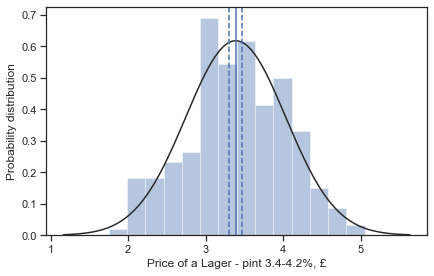

Mean price = £3.39
Lower confidence interval = £3.30
Upper confidence interval = £3.47
Number of quotes = 399
Shapiro-Wilk test = ShapiroResult(statistic=0.9917417764663696, pvalue=0.025665421038866043)


<function __main__.statistical(x)>

In [66]:
interact(statistical, x=['LAGER - PINT 3.4-4.2%','LIQUEUR PER NIP   SPECIFY ML'])

In [67]:
summarise("HOME KILLED BEEF-LEAN MINCE KG")

count    271.000000
mean       7.476568
std        2.064686
min        2.900000
25%        6.180000
50%        7.490000
75%        8.780000
max       13.980000
Name: PRICE, dtype: float64

Test normality for all products

In [68]:
S_W_tests = []

for i in pd.unique(a['ITEM_DESC']):

    result = a[a['ITEM_DESC']==i]
    result = result[result['PRICE']>0]
    
    # Looking at all ANOVA values
    S_W_tests.append((i,stats.shapiro(result['PRICE'])[0],stats.shapiro(result['PRICE'])[1]))
    
Swilk_stats = pd.DataFrame(S_W_tests,columns=['Item','T_Cr','p_val'])
Swilk_stats[['Item','T_Cr','p_val']].sort_values(by='p_val',ascending=True)

,Item,T_Cr,p_val
394,WOMENS LEGGINGS FULL LENGTH,0.359945,7.055836e-33
381,WOMEN'S SKIRT: CASUAL,0.461539,2.500297e-31
378,WOMEN'S CARDIGAN,0.449883,4.000081e-31
383,WOMEN'S VEST/STRAPPY TOP,0.425545,4.382403e-31
407,WOMEN'S NIGHTDRESS/PYJAMAS,0.451221,5.599286e-31
...,...,...,...
445,DAILY DISPOSABLE SOFT LENSES,0.984098,9.940200e-02
347,HOME CARE ASSISTANT HRLY RATE,0.981416,1.663436e-01
494,CAR REPAIRS LOCAL GARAGE,0.984871,2.340499e-01
199,DRAUGHT STOUT PER PINT,0.995732,3.606236e-01


Wilcoxon signed rank stat

In [71]:
def wilcoxon(x):
    plt.clf()
    result = a[a['ITEM_DESC']==x]
    result = result[result['PRICE']>0]
    N = len(result)
    
    sns.distplot(result['PRICE'],kde=False, fit=stats.norm)
    plt.xlabel('Price of a {}, £'.format(str.capitalize(x)))
    plt.ylabel('Probability distribution')
    plt.axvline(confidence_intervals(x)[0])
    plt.axvline(confidence_intervals(x)[1],linestyle='--')
    plt.axvline(confidence_intervals(x)[2],linestyle='--')
    plt.show()
    
    print('Mean price = £{:.2f}'.format(np.mean(result['PRICE'])))
    print('Median price = £{:.2f}'.format(np.median(result['PRICE'])))
    print('Lower confidence interval (normal approx.) = £{:.2f}'.format(confidence_intervals(x)[1]))
    print('Upper confidence interval (normal approx.) = £{:.2f}'.format(confidence_intervals(x)[2]))
    # Shapiro-Wilk test for normality
    print('Shapiro-Wilk test = {}'.format(stats.shapiro(result['PRICE'])))
    print('Sample size = {}'.format(len(result['PRICE'])))
    
    #Wilcoxon signed-rank test
    test, p_val = stats.wilcoxon(x=np.median(result['PRICE'])*np.ones(shape=(N)), y=result['PRICE'])
    print('Wilcoxon Test stat = {}'.format(test))
    print('Wilcoxon P_value = {}'.format(p_val))
    
    confidence = []
    for i in np.linspace(np.median(result['PRICE'])*1, np.median(result['PRICE'])*1.5, num=66):
        p_val = stats.wilcoxon(x=i*np.ones(shape=(N)), y=result['PRICE'])[1]
        confidence.append((i,p_val))
    wilcoxon = pd.DataFrame(confidence,columns=['Medians','p_val'])
    return wilcoxon

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


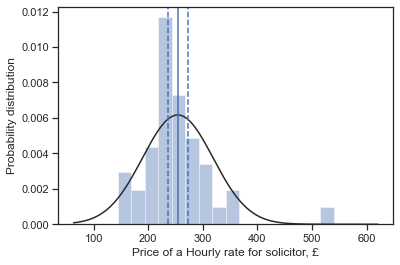

Mean price = £254.09
Median price = £240.00
Lower confidence interval (normal approx.) = £235.69
Upper confidence interval (normal approx.) = £272.49
Shapiro-Wilk test = ShapiroResult(statistic=0.8421726226806641, pvalue=5.8617789733261816e-08)
Sample size = 83
Wilcoxon Test stat = 986.5
Wilcoxon P_value = 0.09462102392757735


,Medians,p_val
0,240.000000,9.462102e-02
1,241.846154,2.393837e-01
2,243.692308,3.660094e-01
3,245.538462,4.161481e-01
4,247.384615,8.167931e-01
...,...,...
61,352.615385,7.855655e-13
62,354.461538,5.633270e-13
63,356.307692,5.633270e-13
64,358.153846,5.269514e-13


In [72]:
wilcoxon("HOURLY RATE FOR SOLICITOR")

In [73]:
def regional_chart(x):
    plt.clf()
    result = a[a['ITEM_DESC']==x]
    result = result[result['PRICE']>0]
    result = result[result['REGION']!='Northern Ireland']
    
    g = result.groupby('REGION')
    
    sns.set(style="ticks")

    # Initialize the figure
    f, ax = plt.subplots(figsize=(7, 6))
    
    sns.boxplot(y="REGION", x="PRICE", data=result)
    sns.swarmplot(y="REGION", x="PRICE", data=result, size=2, color='.3')
    # Add in points to show each observation
    
    plt.title('Boxplot for {}'.format(str.capitalize(x)))
    plt.ylabel('Region code')
    plt.xlabel('Price, £')
    plt.savefig(x+'_regional.png')
    plt.show()
    
    print(g['PRICE'].mean())
    
    # ANOVA
    
    samples = [np.array(x[1]['PRICE']) for x in g]
    f_val, p_val = stats.kruskal(*samples)
    print('F value: {:.3f}, p value: {:.3f}'.format(f_val, p_val))

<Figure size 432x288 with 0 Axes>

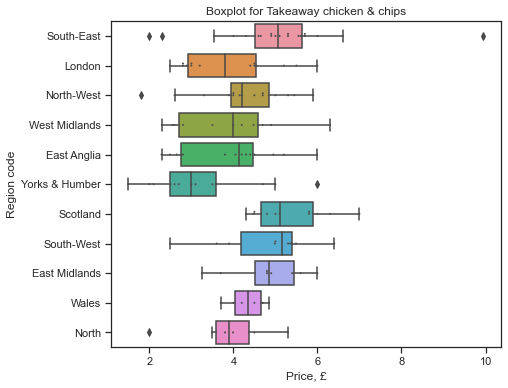

REGION
East Anglia       3.883571
East Midlands     4.806250
London            3.916429
North             3.846667
North-West        4.232667
Scotland          5.371818
South-East        5.050000
South-West        4.793000
Wales             4.325000
West Midlands     3.848182
Yorks & Humber    3.253077
Name: PRICE, dtype: float64
F value: 30.428, p value: 0.001


In [74]:
regional_chart('TAKEAWAY CHICKEN & CHIPS')

In [75]:
F_Stats = []

for i in pd.unique(a['ITEM_DESC']):

    result = a[a['ITEM_DESC']==i]
    result = result[result['PRICE']>0]
    
    # Looking at all ANOVA values
    g = result.groupby('REGION')
    samples = [np.array(x[1]['PRICE']) for x in g]
    f_val, p_val = stats.kruskal(*samples)
    
    F_Stats.append((i,f_val,p_val))

F_Stats = pd.DataFrame(F_Stats,columns=['Item','f_val','p_val'])

In [76]:
F_Stats.sort_values(by='p_val',ascending=False).head(n=30)

,Item,f_val,p_val
144,MELON EACH EG HONEYDEW,1.238678,0.999852
512,MP4 PLAYER,1.591143,0.999821
221,VODKA-70 CL BOTTLE,1.342292,0.999780
311,WASHING UP LIQUID 380-900ML,1.372081,0.999754
122,VEGETABLE STIR FRY FRESH PACK,1.467171,0.999659
118,PRE-PACKED SALAD 100-250G,1.574546,0.999518
123,SWEET POTATO PER KG,1.672965,0.999355
6,DRY SPAGHETTI OR PASTA 500G,1.895951,0.998830
207,LAGER 12 - 24 CANS (440-500ML),2.017262,0.998434
384,WOMENS DRESS -CASUAL/FORMAL,2.521025,0.998084


In [77]:
len(F_Stats[F_Stats['p_val']<0.05])

106

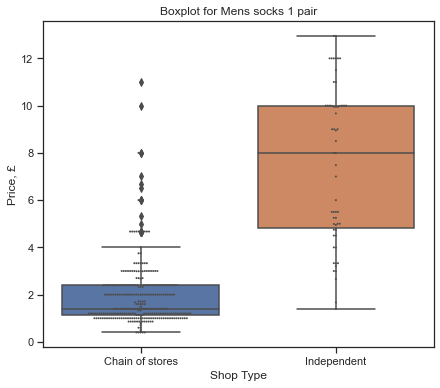

SHOP_TYPE
Chain of stores    2.013203
Independent        7.511379
Name: PRICE, dtype: float64
Shapiro-Wilk test = [ShapiroResult(statistic=0.7307813167572021, pvalue=4.8377427903997244e-21), ShapiroResult(statistic=0.9316719770431519, pvalue=0.0028513146098703146)]
Variances = [2.1291349375008, 10.721570511296076]
F value: 401.414, p value: 0.000


In [116]:
shoptype_chart('MENS SOCKS 1 PAIR')

In [110]:
F_Stats = []

for i in pd.unique(a['ITEM_DESC']):

    result = a[a['ITEM_DESC']==i]
    result = result[result['PRICE']>0]
    
    # Looking at all ANOVA values
    g = result.groupby('SHOP_TYPE')
    samples = [x[1]['PRICE'] for x in g]
    
    if len(samples)>1:
        f_val, p_val = stats.f_oneway(*samples)

        F_Stats.append((i,f_val,p_val))

F_Stats = pd.DataFrame(F_Stats,columns=['Item','f_val','p_val'])

In [111]:
F_Stats.sort_values(by='p_val',ascending=True)

,Item,f_val,p_val
381,MENS SOCKS 1 PAIR,433.884824,2.628217e-63
120,BANANAS-PER KG,520.131653,3.259348e-63
99,FRESH VEG-CUCUMBER-WHOLE,416.019414,2.653576e-57
100,FRESH VEG-LETTUCE-ICEBERG-EACH,362.404638,1.065520e-51
327,MENS JEANS,238.177930,1.581973e-41
...,...,...,...
138,DRIED POTTED SNACK 50-120G,0.005652,9.401826e-01
322,FUNERAL-CREMATION,0.001149,9.729816e-01
24,FROZEN BEEFBURGERS PACK OF 4,0.000132,9.908450e-01
449,NON-NHS MEDICINE-PHYSIOTHERAPY,0.000115,9.914533e-01


# Seasonal trends

In [130]:
b = pd.concat(pd.read_csv(i,names=headings,skiprows=1) for i in os.listdir() if i.startswith('upload'))
b.head()

,QUOTE_DATE,ITEM_ID,ITEM_DESC,VALIDITY,SHOP_CODE,PRICE,INDICATOR_BOX,ORIG_INDICATOR_BOX,PRICE_RELATIVE,LOG_PRICE_RELATIVE,STRATUM_WEIGHT,STRATUM_TYPE,START_DATE,END_DATE,REGION,SHOP_TYPE,SHOP_WEIGHT,BASE_PRICE,BASE_VALIDITY,STRATUM_CELL
0,201601,210102,LARGE LOAF-WHITE-UNSLICED-800G,1,21,0.0,T,T,0.0,0.0,8.21,1,201502,999999,8,1,1,1.390,3,8
1,201601,210102,LARGE LOAF-WHITE-UNSLICED-800G,1,27,0.0,T,T,0.0,0.0,11.57,1,201504,999999,9,1,1,1.383,4,9
2,201601,210102,LARGE LOAF-WHITE-UNSLICED-800G,1,40,0.0,T,T,0.0,0.0,8.21,1,201502,999999,8,1,1,1.390,3,8
3,201601,210102,LARGE LOAF-WHITE-UNSLICED-800G,1,43,0.0,M,M,0.0,0.0,10.73,1,201502,999999,2,1,1,3.690,3,2
4,201601,210102,LARGE LOAF-WHITE-UNSLICED-800G,1,47,0.0,T,T,0.0,0.0,8.21,1,201502,999999,8,1,1,1.390,3,8


In [131]:
import datetime as dt
b['QUOTE_DATE'] = b['QUOTE_DATE'].apply(lambda x: dt.datetime.strftime(dt.datetime.strptime(str(x)[-2:],'%m'),'%b'))
b.head()

,QUOTE_DATE,ITEM_ID,ITEM_DESC,VALIDITY,SHOP_CODE,PRICE,INDICATOR_BOX,ORIG_INDICATOR_BOX,PRICE_RELATIVE,LOG_PRICE_RELATIVE,STRATUM_WEIGHT,STRATUM_TYPE,START_DATE,END_DATE,REGION,SHOP_TYPE,SHOP_WEIGHT,BASE_PRICE,BASE_VALIDITY,STRATUM_CELL
0,Jan,210102,LARGE LOAF-WHITE-UNSLICED-800G,1,21,0.0,T,T,0.0,0.0,8.21,1,201502,999999,8,1,1,1.390,3,8
1,Jan,210102,LARGE LOAF-WHITE-UNSLICED-800G,1,27,0.0,T,T,0.0,0.0,11.57,1,201504,999999,9,1,1,1.383,4,9
2,Jan,210102,LARGE LOAF-WHITE-UNSLICED-800G,1,40,0.0,T,T,0.0,0.0,8.21,1,201502,999999,8,1,1,1.390,3,8
3,Jan,210102,LARGE LOAF-WHITE-UNSLICED-800G,1,43,0.0,M,M,0.0,0.0,10.73,1,201502,999999,2,1,1,3.690,3,2
4,Jan,210102,LARGE LOAF-WHITE-UNSLICED-800G,1,47,0.0,T,T,0.0,0.0,8.21,1,201502,999999,8,1,1,1.390,3,8


In [132]:
def seasonal_analysis(x):
    
    plt.clf()
    
    result = b[b['ITEM_DESC']==x]
    result = result[result['PRICE']>0]
    
    # Initialize the figure
    f, ax = plt.subplots(figsize=(7, 6))
    
    sns.boxplot(y="PRICE", x="QUOTE_DATE", data=result)
    sns.swarmplot(y="PRICE", x="QUOTE_DATE", data=result, size=2, color='.3')
    # Add in points to show each observation
    
    plt.title('Boxplot for {}'.format(str.capitalize(x)))
    plt.ylabel('Price, £')
    plt.xlabel('Month of 2016')

    plt.show()

    g = result.groupby('QUOTE_DATE')
    
    # ANOVA
    
    samples = [np.array(x[1]['PRICE']) for x in g]
    
    # Look at min length of array

    minimum_sample = np.min([len(i) for i in samples])

    # Randomly remove

    samples = [np.random.choice(i,minimum_sample) for i in samples]
    
    #Friedman
    f_val, p_val = stats.friedmanchisquare(*samples)
    print('F value: {:.3f}, p value: {:.3f}'.format(f_val, p_val))
    
    print(g['PRICE'].mean())

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

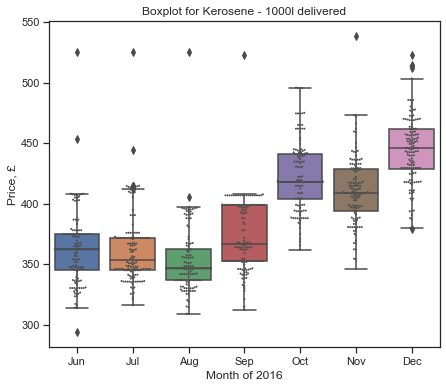

F value: 506.239, p value: 0.000
QUOTE_DATE
Aug    353.054436
Dec    444.412647
Jul    362.422985
Jun    361.453603
Nov    410.575344
Oct    423.470534
Sep    373.458947
Name: PRICE, dtype: float64


In [141]:
seasonal_analysis("""KEROSENE - 1000L DELIVERED""")

In [134]:
F_Stats = []

for i in pd.unique(b['ITEM_DESC']):

    try:
        result = b[b['ITEM_DESC']==i]
        result = result[result['PRICE']>0]

        # Looking at all ANOVA values
        g = result.groupby('QUOTE_DATE')
        samples = [np.array(x[1]['PRICE']) for x in g]

        minimum_sample = np.min([len(i) for i in samples])

        samples = [np.random.choice(i,minimum_sample) for i in samples]

        f_val, p_val = stats.friedmanchisquare(*samples)

        F_Stats.append((i,f_val,p_val))
    
    except ValueError:
        pass
    
F_Stats = pd.DataFrame(F_Stats,columns=['Item','f_val','p_val'])

In [137]:
F_Stats.sort_values(by='p_val',ascending=True).head(n=20)

,Item,f_val,p_val
797,KEROSENE - 1000L DELIVERED,489.183690,1.796869e-102
773,CIGARETTES 8,275.162429,1.704665e-56
774,CIGARETTES 12,262.858948,7.309182e-54
776,CIGARETTES 20,190.898758,1.638615e-38
696,MELON EACH EG HONEYDEW,190.897378,1.639723e-38
777,20 FILTER - OTHER BRAND,176.844801,1.586925e-35
248,KEROSENE - 1000L DELIVERED,161.686728,6.355599e-34
224,CIGARETTES 15,158.588658,2.934914e-33
223,CIGARETTES 12,146.348930,1.233071e-30
775,CIGARETTES 15,145.038354,8.653131e-29
